# Prova DataScience - Dados Futebol

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.optimizers import Adadelta


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Prova/Futebol/games.csv', low_memory=False)
df.tail()

,ID,Competition_Name,Country,Season_End_Year,Round,Wk,Day,Date,Time,Home,...,bench_name_away7,bench_age_away7,bench_position_away7,bench_minutes_away7,bench_goals_away7,bench_name_away8,bench_age_away8,bench_position_away8,bench_minutes_away8,bench_goals_away8
27841,27842,UEFA Super Cup,EU,2019,Finals,NaN,Wed,8/15/2018,22:00,Real Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27842,27843,UEFA Super Cup,EU,2020,Finals,NaN,Wed,8/14/2019,22:00,Liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27843,27844,UEFA Super Cup,EU,2021,Finals,NaN,Thu,9/24/2020,21:00,Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27844,27845,UEFA Super Cup,EU,2022,Finals,NaN,Wed,8/11/2021,20:00,Chelsea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27845,27846,UEFA Super Cup,EU,2023,Finals,NaN,Wed,8/10/2022,22:00,Real Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_rel = ['ID', 'Competition_Name', 'Country', 'Season_End_Year','Date','Time','Home', 'Away', 'HomeGoals', 'AwayGoals',
              'Venue', 'venue_city', 'Referee','manager_home', 'captain_home', 'manager_away', 'captain_away', 'formation_home',
              'formation_away', 'possessiontime_home', 'possessiontime_away', 'shots_total_home', 'shots_ongoal_home', 'shots_offgoal_home',
              'shots_total_away', 'shots_ongoal_away', 'shots_offgoal_away', 'saves_home', 'saves_away', 'yellow_cards_home', 'red_cards_home',
              'yellowred_cards_home', 'yellow_cards_away', 'red_cards_away', 'yellowred_cards_away', 'fouls_home', 'fouls_away', 'offsides_home', 'offsides_away']

In [ ]:
df_result = df[column_rel]

In [ ]:
mapeamento_colunas = {
    'ID': 'ID',
    'Competition_Name': 'Nome_Competicao',
    'Country': 'Pais',
    'Season_End_Year':'Ano',
    'Home':'Casa',
    'Away':'Visitante',
    'HomeGoals':'Gol_Casa',
    'AwayGoals':'Gol_Visitante',
    'Venue':'Estadio',
    'venue_city':'Cidade_Estadio',
    'Referee':'Arbitro',
    'manager_home':'Tecnico_Casa',
    'captain_home':'Capitao_Casa',
    'manager_away':'Tecnico_Visitante',
    'captain_away':'Capitao_Visitante',
    'formation_home':'Formacao_Casa',
    'formation_away':'Formacao_Visitante',
    'possessiontime_home':'Posse_Bola_Casa',
    'possessiontime_away':'Posse_Bola_Visitante',
    'shots_total_home':'Finalizacoes_Totais_Casa',
    'shots_ongoal_home':'Finalizacoes_Gol_Casa',
    'shots_offgoal_home':'Finalizacoes_Fora_Casa',
    'shots_total_away':'Finalizacoes_Totais_Visitante',
    'shots_ongoal_away':'Finalizacoes_Gol_Visitante',
    'shots_offgoal_away':'Finalizacoes_Fora_Visitante',
    'saves_home':'Defesas_Casa',
    'saves_away':'Defesas_Visitante',
    'yellow_cards_home':'Amarelo_Casa',
    'red_cards_home':'Vermelho_Casa',
    'yellowred_cards_home':'Amarelo_Vermelho_Casa',
    'yellow_cards_away':'Amarelo_Visitante',
    'red_cards_away':'Vermelho_Visitante',
    'yellowred_cards_away':'Amarelo_Vermelho_Visitante',
    'fouls_home':'Faltas_Casa',
    'fouls_away':'Faltas_Visitante',
    'offsides_home':'Impedimentos_Casa',
    'offsides_away':'Impedimentos_Visitante'
}

In [ ]:
df_final = df_result[column_rel].rename(columns=mapeamento_colunas)

In [ ]:
df_final['data_hora'] = pd.to_datetime(df_result['Date'] + ' ' + df_result['Time'], errors='coerce')

colunas = ['data_hora'] + [coluna for coluna in df_final if coluna != 'data_hora']
df_final = df_final[colunas]

In [ ]:
df_final = df_final.drop(['Date', 'Time'], axis=1)

In [ ]:
df_final.tail()

,data_hora,ID,Nome_Competicao,Pais,Ano,Casa,Visitante,Gol_Casa,Gol_Visitante,Estadio,...,Amarelo_Casa,Vermelho_Casa,Amarelo_Vermelho_Casa,Amarelo_Visitante,Vermelho_Visitante,Amarelo_Vermelho_Visitante,Faltas_Casa,Faltas_Visitante,Impedimentos_Casa,Impedimentos_Visitante
27841,2018-08-15 22:00:00,27842,UEFA Super Cup,EU,2019,Real Madrid,Atlético Madrid,2,4,A. Le Coq Arena,...,5.0,0.0,0.0,3.0,0.0,0.0,25.0,17.0,1.0,2.0
27842,2019-08-14 22:00:00,27843,UEFA Super Cup,EU,2020,Liverpool,Chelsea,2,2,Vodafone Arena,...,2.0,0.0,0.0,1.0,0.0,0.0,10.0,12.0,2.0,10.0
27843,2020-09-24 21:00:00,27844,UEFA Super Cup,EU,2021,Bayern Munich,Sevilla,2,1,Puskás Aréna,...,2.0,0.0,0.0,4.0,0.0,0.0,15.0,18.0,3.0,3.0
27844,2021-08-11 20:00:00,27845,UEFA Super Cup,EU,2022,Chelsea,Villarreal,1,1,Windsor Park,...,2.0,0.0,0.0,2.0,0.0,0.0,10.0,15.0,4.0,2.0
27845,2022-08-10 22:00:00,27846,UEFA Super Cup,EU,2023,Real Madrid,Eintracht Frankfurt,2,0,Helsingin olympiastadion,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
missing_values = df_final.isnull().sum()
missing_values.tail

<bound method NDFrame.tail of data_hora                           1
ID                                  0
Nome_Competicao                     0
Pais                                0
Ano                                 0
Casa                                0
Visitante                           0
Gol_Casa                            0
Gol_Visitante                       0
Estadio                             1
Cidade_Estadio                      1
Arbitro                             0
Tecnico_Casa                        0
Capitao_Casa                     2757
Tecnico_Visitante                   0
Capitao_Visitante                2751
Formacao_Casa                    1060
Formacao_Visitante               1061
Posse_Bola_Casa                  1280
Posse_Bola_Visitante             1280
Finalizacoes_Totais_Casa         2304
Finalizacoes_Gol_Casa            1214
Finalizacoes_Fora_Casa           2307
Finalizacoes_Totais_Visitante    2304
Finalizacoes_Gol_Visitante       1214
Finalizacoes_Fora_Vi

In [ ]:
df_final = df_final.dropna()

In [ ]:
missing_values = df_final.isnull().sum()
missing_values.tail

<bound method NDFrame.tail of data_hora                        0
ID                               0
Nome_Competicao                  0
Pais                             0
Ano                              0
Casa                             0
Visitante                        0
Gol_Casa                         0
Gol_Visitante                    0
Estadio                          0
Cidade_Estadio                   0
Arbitro                          0
Tecnico_Casa                     0
Capitao_Casa                     0
Tecnico_Visitante                0
Capitao_Visitante                0
Formacao_Casa                    0
Formacao_Visitante               0
Posse_Bola_Casa                  0
Posse_Bola_Visitante             0
Finalizacoes_Totais_Casa         0
Finalizacoes_Gol_Casa            0
Finalizacoes_Fora_Casa           0
Finalizacoes_Totais_Visitante    0
Finalizacoes_Gol_Visitante       0
Finalizacoes_Fora_Visitante      0
Defesas_Casa                     0
Defesas_Visitante        

In [ ]:
df_final['Vencedor'] = df_final.apply(lambda row: 'Casa' if row['Gol_Casa'] > row['Gol_Visitante'] else
                                      ('Visitante' if row['Gol_Casa'] < row['Gol_Visitante'] else 'Empate'), axis=1)

In [ ]:
df_final.tail()

,data_hora,ID,Nome_Competicao,Pais,Ano,Casa,Visitante,Gol_Casa,Gol_Visitante,Estadio,...,Vermelho_Casa,Amarelo_Vermelho_Casa,Amarelo_Visitante,Vermelho_Visitante,Amarelo_Vermelho_Visitante,Faltas_Casa,Faltas_Visitante,Impedimentos_Casa,Impedimentos_Visitante,Vencedor
27840,2017-08-08 20:45:00,27841,UEFA Super Cup,EU,2018,Real Madrid,Manchester United,2,1,Telekom Arena,...,0.0,0.0,2.0,0.0,0.0,11.0,17.0,1.0,2.0,Casa
27841,2018-08-15 22:00:00,27842,UEFA Super Cup,EU,2019,Real Madrid,Atlético Madrid,2,4,A. Le Coq Arena,...,0.0,0.0,3.0,0.0,0.0,25.0,17.0,1.0,2.0,Visitante
27842,2019-08-14 22:00:00,27843,UEFA Super Cup,EU,2020,Liverpool,Chelsea,2,2,Vodafone Arena,...,0.0,0.0,1.0,0.0,0.0,10.0,12.0,2.0,10.0,Empate
27843,2020-09-24 21:00:00,27844,UEFA Super Cup,EU,2021,Bayern Munich,Sevilla,2,1,Puskás Aréna,...,0.0,0.0,4.0,0.0,0.0,15.0,18.0,3.0,3.0,Casa
27844,2021-08-11 20:00:00,27845,UEFA Super Cup,EU,2022,Chelsea,Villarreal,1,1,Windsor Park,...,0.0,0.0,2.0,0.0,0.0,10.0,15.0,4.0,2.0,Empate


In [ ]:
df_baseFinal = df_final.drop(['Gol_Casa', 'Gol_Visitante'], axis=1)

In [ ]:
# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar e transformar a coluna 'Vencedor' para rótulos numéricos
df_baseFinal['Vencedor'] = label_encoder.fit_transform(df_baseFinal['Vencedor'])

# Exibir os mapeamentos entre categorias e rótulos numéricos
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Exibir o DataFrame resultante
print(df_baseFinal.head())

{'Casa': 0, 'Empate': 1, 'Visitante': 2}
              data_hora   ID     Nome_Competicao Pais   Ano           Casa  \
244 2015-05-23 15:30:00  245  Fußball-Bundesliga  GER  2015       Dortmund   
306 2015-08-14 20:30:00  307  Fußball-Bundesliga  GER  2016  Bayern Munich   
307 2015-08-15 15:30:00  308  Fußball-Bundesliga  GER  2016       Augsburg   
308 2015-08-15 15:30:00  309  Fußball-Bundesliga  GER  2016   Darmstadt 98   
309 2015-08-15 15:30:00  310  Fußball-Bundesliga  GER  2016     Leverkusen   

         Visitante                                   Estadio Cidade_Estadio  \
244  Werder Bremen                         Signal Iduna Park       Dortmund   
306   Hamburger SV                             Allianz Arena        München   
307     Hertha BSC                                 WWK Arena       Augsburg   
308    Hannover 96  Jonathan-Heimes-Stadion am Böllenfalltor      Darmstadt   
309     Hoffenheim                                  BayArena     Leverkusen   

             Ar

0 - Casa // 1 - Empate // 2 - Visitante

In [ ]:
df_baseFinal.tail()

,data_hora,ID,Nome_Competicao,Pais,Ano,Casa,Visitante,Estadio,Cidade_Estadio,Arbitro,...,Vermelho_Casa,Amarelo_Vermelho_Casa,Amarelo_Visitante,Vermelho_Visitante,Amarelo_Vermelho_Visitante,Faltas_Casa,Faltas_Visitante,Impedimentos_Casa,Impedimentos_Visitante,Vencedor
27840,2017-08-08 20:45:00,27841,UEFA Super Cup,EU,2018,Real Madrid,Manchester United,Telekom Arena,Skopje,Gianluca Rocchi,...,0.0,0.0,2.0,0.0,0.0,11.0,17.0,1.0,2.0,0
27841,2018-08-15 22:00:00,27842,UEFA Super Cup,EU,2019,Real Madrid,Atlético Madrid,A. Le Coq Arena,Tallinn,Szymon Marciniak,...,0.0,0.0,3.0,0.0,0.0,25.0,17.0,1.0,2.0,2
27842,2019-08-14 22:00:00,27843,UEFA Super Cup,EU,2020,Liverpool,Chelsea,Vodafone Arena,İstanbul,Stéphanie Frappart,...,0.0,0.0,1.0,0.0,0.0,10.0,12.0,2.0,10.0,1
27843,2020-09-24 21:00:00,27844,UEFA Super Cup,EU,2021,Bayern Munich,Sevilla,Puskás Aréna,Budapest,Anthony Taylor,...,0.0,0.0,4.0,0.0,0.0,15.0,18.0,3.0,3.0,0
27844,2021-08-11 20:00:00,27845,UEFA Super Cup,EU,2022,Chelsea,Villarreal,Windsor Park,Belfast,Sergey Karasev,...,0.0,0.0,2.0,0.0,0.0,10.0,15.0,4.0,2.0,1


In [ ]:
df_baseFinal.tail()

,data_hora,ID,Nome_Competicao,Pais,Ano,Casa,Visitante,Estadio,Cidade_Estadio,Arbitro,...,Vermelho_Casa,Amarelo_Vermelho_Casa,Amarelo_Visitante,Vermelho_Visitante,Amarelo_Vermelho_Visitante,Faltas_Casa,Faltas_Visitante,Impedimentos_Casa,Impedimentos_Visitante,Vencedor
27840,2017-08-08 20:45:00,27841,UEFA Super Cup,EU,2018,Real Madrid,Manchester United,Telekom Arena,Skopje,Gianluca Rocchi,...,0.0,0.0,2.0,0.0,0.0,11.0,17.0,1.0,2.0,0
27841,2018-08-15 22:00:00,27842,UEFA Super Cup,EU,2019,Real Madrid,Atlético Madrid,A. Le Coq Arena,Tallinn,Szymon Marciniak,...,0.0,0.0,3.0,0.0,0.0,25.0,17.0,1.0,2.0,2
27842,2019-08-14 22:00:00,27843,UEFA Super Cup,EU,2020,Liverpool,Chelsea,Vodafone Arena,İstanbul,Stéphanie Frappart,...,0.0,0.0,1.0,0.0,0.0,10.0,12.0,2.0,10.0,1
27843,2020-09-24 21:00:00,27844,UEFA Super Cup,EU,2021,Bayern Munich,Sevilla,Puskás Aréna,Budapest,Anthony Taylor,...,0.0,0.0,4.0,0.0,0.0,15.0,18.0,3.0,3.0,0
27844,2021-08-11 20:00:00,27845,UEFA Super Cup,EU,2022,Chelsea,Villarreal,Windsor Park,Belfast,Sergey Karasev,...,0.0,0.0,2.0,0.0,0.0,10.0,15.0,4.0,2.0,1


In [ ]:
vars_cat = ['Nome_Competicao', 'Pais','Casa', 'Visitante', 'Estadio', 'Cidade_Estadio',
            'Arbitro', 'Tecnico_Casa', 'Capitao_Casa','Tecnico_Visitante', 'Capitao_Visitante',
            'Formacao_Casa', 'Formacao_Visitante','Defesas_Casa', 'Defesas_Visitante']

vars_num = ['Ano','Posse_Bola_Casa','Posse_Bola_Visitante','Finalizacoes_Totais_Casa','Finalizacoes_Gol_Casa',
            'Finalizacoes_Fora_Casa','Finalizacoes_Totais_Visitante','Finalizacoes_Gol_Visitante','Finalizacoes_Fora_Visitante',
            'Amarelo_Casa','Vermelho_Casa','Amarelo_Vermelho_Casa','Amarelo_Visitante','Vermelho_Visitante','Amarelo_Vermelho_Visitante',
            'Faltas_Casa','Faltas_Visitante','Impedimentos_Casa','Impedimentos_Visitante']

In [ ]:
# Converter todas as variáveis categóricas para strings
df_baseFinal[vars_cat] = df_baseFinal[vars_cat].astype(str)

# Aplicar a codificação ordinal
label_encoder = LabelEncoder()
for var in vars_cat:
    df_baseFinal[var] = label_encoder.fit_transform(df_baseFinal[var])

In [ ]:
df_baseFinal.tail()

,data_hora,ID,Nome_Competicao,Pais,Ano,Casa,Visitante,Estadio,Cidade_Estadio,Arbitro,...,Vermelho_Casa,Amarelo_Vermelho_Casa,Amarelo_Visitante,Vermelho_Visitante,Amarelo_Vermelho_Visitante,Faltas_Casa,Faltas_Visitante,Impedimentos_Casa,Impedimentos_Visitante,Vencedor
27840,2017-08-08 20:45:00,27841,24,4,2018,540,343,757,500,279,...,0.0,0.0,2.0,0.0,0.0,11.0,17.0,1.0,2.0,0
27841,2018-08-15 22:00:00,27842,24,4,2019,540,47,0,520,757,...,0.0,0.0,3.0,0.0,0.0,25.0,17.0,1.0,2.0,2
27842,2019-08-14 22:00:00,27843,24,4,2020,391,137,801,600,689,...,0.0,0.0,1.0,0.0,0.0,10.0,12.0,2.0,10.0,1
27843,2020-09-24 21:00:00,27844,24,4,2021,86,489,524,93,61,...,0.0,0.0,4.0,0.0,0.0,15.0,18.0,3.0,3.0,0
27844,2021-08-11 20:00:00,27845,24,4,2022,166,568,820,46,668,...,0.0,0.0,2.0,0.0,0.0,10.0,15.0,4.0,2.0,1


In [ ]:
# Para rótulos numéricos
num_classes = len(df_baseFinal['Vencedor'].unique())


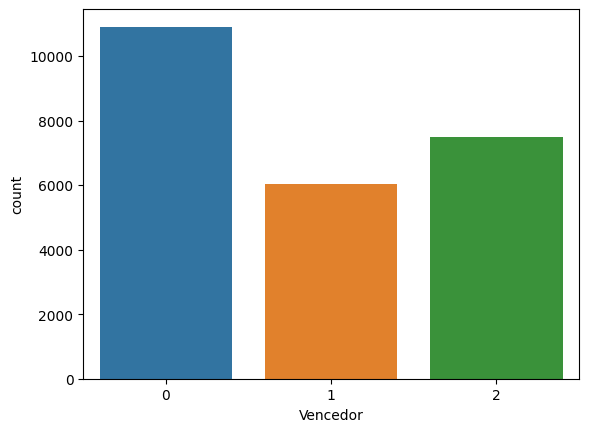

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para rótulos numéricos
sns.countplot(x='Vencedor', data=df_baseFinal)
plt.show()

In [ ]:
features = df_baseFinal[['Nome_Competicao', 'Pais','Casa', 'Visitante', 'Estadio', 'Cidade_Estadio',
            'Arbitro', 'Tecnico_Casa', 'Capitao_Casa','Tecnico_Visitante', 'Capitao_Visitante',
            'Formacao_Casa', 'Formacao_Visitante','Defesas_Casa', 'Defesas_Visitante', 'Ano','Posse_Bola_Casa','Posse_Bola_Visitante','Finalizacoes_Totais_Casa','Finalizacoes_Gol_Casa',
            'Finalizacoes_Fora_Casa','Finalizacoes_Totais_Visitante','Finalizacoes_Gol_Visitante','Finalizacoes_Fora_Visitante',
            'Amarelo_Casa','Vermelho_Casa','Amarelo_Vermelho_Casa','Amarelo_Visitante','Vermelho_Visitante','Amarelo_Vermelho_Visitante',
            'Faltas_Casa','Faltas_Visitante','Impedimentos_Casa','Impedimentos_Visitante']]
target = df_baseFinal['Vencedor']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Inicialize o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treine o modelo
model.fit(X_train, y_train)

# Obtenha as importâncias das features
feature_importances = model.feature_importances_

# Crie um DataFrame para visualizar as importâncias das features
importances_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Ordene o DataFrame pelas importâncias das features
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Exiba o DataFrame
print(importances_df)

                          Feature  Importance
19          Finalizacoes_Gol_Casa    0.205192
22     Finalizacoes_Gol_Visitante    0.187797
14              Defesas_Visitante    0.173096
13                   Defesas_Casa    0.157009
7                    Tecnico_Casa    0.016384
8                    Capitao_Casa    0.016206
2                            Casa    0.015856
3                       Visitante    0.015638
6                         Arbitro    0.014777
9               Tecnico_Visitante    0.013874
5                  Cidade_Estadio    0.013774
4                         Estadio    0.012200
10              Capitao_Visitante    0.012147
31               Faltas_Visitante    0.011369
15                            Ano    0.011211
0                 Nome_Competicao    0.010467
30                    Faltas_Casa    0.010312
16                Posse_Bola_Casa    0.009861
12             Formacao_Visitante    0.009687
20         Finalizacoes_Fora_Casa    0.009153
17           Posse_Bola_Visitante 

In [ ]:
X = df_baseFinal[['Finalizacoes_Gol_Casa','Finalizacoes_Gol_Visitante','Defesas_Casa','Defesas_Visitante', 'Posse_Bola_Casa',
                         'Faltas_Visitante', 'Faltas_Casa','Visitante', 'Casa','Posse_Bola_Visitante']]
y = df_baseFinal.Vencedor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2023,stratify=y_test)

In [ ]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_val_one_hot = to_categorical(y_val, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [ ]:
print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(X_val)}")

 Treino 17098, Teste 3664, Validacao 3664


In [ ]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

In [ ]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 100:
        return 0.005
    elif epoch < 200:
        return 0.001
    elif epoch < 300:
        return 0.0005
    elif epoch < 400:
        return 0.0001
    elif epoch < 500:
        return 0.00005
    else:
        return 0.00001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

# Modelo Adam - Softmax

*   batch_size = len(0.05)
*   activation = softmax
*   loss = categorical_crossentropy







In [ ]:
# Crie o modelo sequencial
model1 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model1.add(tf.keras.layers.Dense(3, activation='softmax')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


history1 = model1.fit(X_train.values, y_train_one_hot, epochs=1000, batch_size=int(0.05*len(X_train)), verbose=1,
                       callbacks=[early_stopping_callback, lr_scheduler_callback],
                       validation_data=(X_val.values, y_val_one_hot))


Epoch 1/1000
21/21 [==============================] - 2s 32ms/step - loss: 10.2904 - accuracy: 0.3462 - val_loss: 1.1682 - val_accuracy: 0.4050 - lr: 0.0050
Epoch 2/1000
21/21 [==============================] - 0s 23ms/step - loss: 1.1022 - accuracy: 0.4269 - val_loss: 1.0778 - val_accuracy: 0.4465 - lr: 0.0050
Epoch 3/1000
21/21 [==============================] - 0s 21ms/step - loss: 1.0794 - accuracy: 0.4454 - val_loss: 1.0706 - val_accuracy: 0.4465 - lr: 0.0050
Epoch 4/1000
21/21 [==============================] - 0s 19ms/step - loss: 1.0693 - accuracy: 0.4465 - val_loss: 1.0780 - val_accuracy: 0.4465 - lr: 0.0050
Epoch 5/1000
21/21 [==============================] - 0s 21ms/step - loss: 1.0663 - accuracy: 0.4491 - val_loss: 1.0618 - val_accuracy: 0.4473 - lr: 0.0050
Epoch 6/1000
21/21 [==============================] - 0s 19ms/step - loss: 1.0540 - accuracy: 0.4518 - val_loss: 1.0575 - val_accuracy: 0.4626 - lr: 0.0050
Epoch 7/1000
21/21 [==============================] - 0s 21ms/s

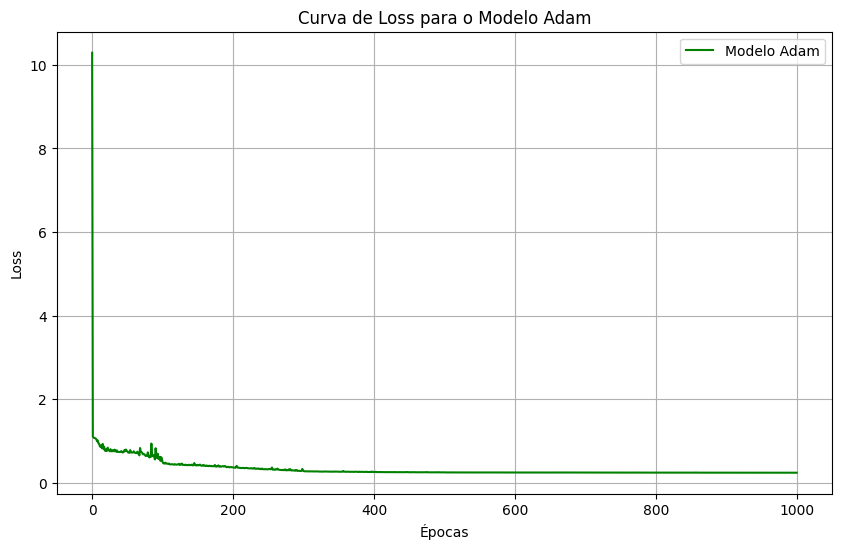

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label='Modelo Adam', color='green')

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Loss para o Modelo Adam')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
previsoesAdam = model1.predict(X_test)

115/115 [==============================] - 0s 2ms/step


In [ ]:
rótulos_previstosAdam = np.argmax(previsoesAdam, axis=1)

In [ ]:
matriz_confusao = confusion_matrix(y_test, rótulos_previstosAdam)

# Imprima a matriz de confusão
print("Matriz de Confusão Adam:")
print(matriz_confusao)

Matriz de Confusão Adam:
[[1513  114    9]
 [  76  752   79]
 [  11   97 1013]]


In [ ]:
# Supondo que você já tenha treinado o modelo e feito previsões no conjunto de validação (X_val)
previsoes_val = model1.predict(X_val)
rotulos_previstos_val = np.argmax(previsoes_val, axis=1)

# Calcular a matriz de confusão para o conjunto de validação
matriz_confusao_val = confusion_matrix(y_val, rotulos_previstos_val)

# Imprimir a matriz de confusão para o conjunto de validação
print("Matriz de Confusão para Validação Adam:")
print(matriz_confusao_val)


115/115 [==============================] - 0s 2ms/step
Matriz de Confusão para Validação Adam:
[[1515  108   13]
 [ 103  729   74]
 [   5   91 1026]]


In [ ]:
print(classification_report(y_test, rótulos_previstosAdam))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1636
           1       0.78      0.83      0.80       907
           2       0.92      0.90      0.91      1121

    accuracy                           0.89      3664
   macro avg       0.88      0.89      0.88      3664
weighted avg       0.90      0.89      0.90      3664



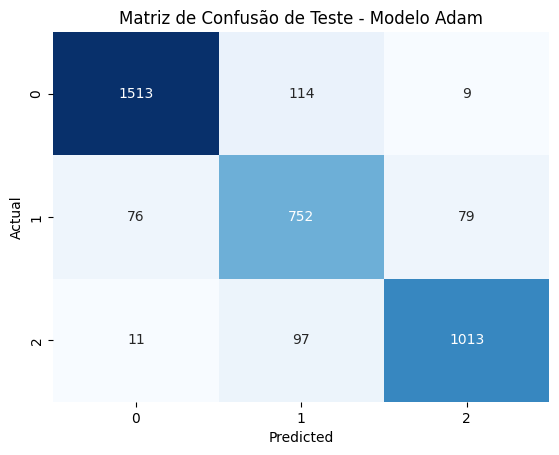

In [ ]:
# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test, rótulos_previstosAdam)

# Criar um heatmap da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Definir rótulos dos eixos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão de Teste - Modelo Adam')

# Exibir a matriz de confusão
plt.show()

# Modelo Adadelta - Softmax

*   batch_size = len(0.05)
*   activation = softmax
*   loss = categorical_crossentropy

In [ ]:
# Crie o modelo sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu'))

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu'))

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu'))

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu'))

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu'))

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(3, activation='softmax')) #O valor 3 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model2.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])


history2 = model2.fit(X_train.values, y_train_one_hot, epochs=1000, batch_size=int(0.05*len(X_train)), verbose=1,
                       callbacks=[early_stopping_callback, lr_scheduler_callback],
                       validation_data=(X_val.values, y_val_one_hot))


Epoch 1/1000
21/21 [==============================] - 2s 49ms/step - loss: 10.6612 - accuracy: 0.2473 - val_loss: 5.5426 - val_accuracy: 0.2467 - lr: 0.0050
Epoch 2/1000
21/21 [==============================] - 1s 39ms/step - loss: 3.3825 - accuracy: 0.2702 - val_loss: 1.9629 - val_accuracy: 0.3073 - lr: 0.0050
Epoch 3/1000
21/21 [==============================] - 1s 38ms/step - loss: 1.5872 - accuracy: 0.3187 - val_loss: 1.3121 - val_accuracy: 0.3715 - lr: 0.0050
Epoch 4/1000
21/21 [==============================] - 1s 39ms/step - loss: 1.2154 - accuracy: 0.3498 - val_loss: 1.1702 - val_accuracy: 0.3548 - lr: 0.0050
Epoch 5/1000
21/21 [==============================] - 1s 65ms/step - loss: 1.1353 - accuracy: 0.3692 - val_loss: 1.1373 - val_accuracy: 0.3701 - lr: 0.0050
Epoch 6/1000
21/21 [==============================] - 1s 68ms/step - loss: 1.1122 - accuracy: 0.3807 - val_loss: 1.1584 - val_accuracy: 0.3204 - lr: 0.0050
Epoch 7/1000
21/21 [==============================] - 1s 67ms/s

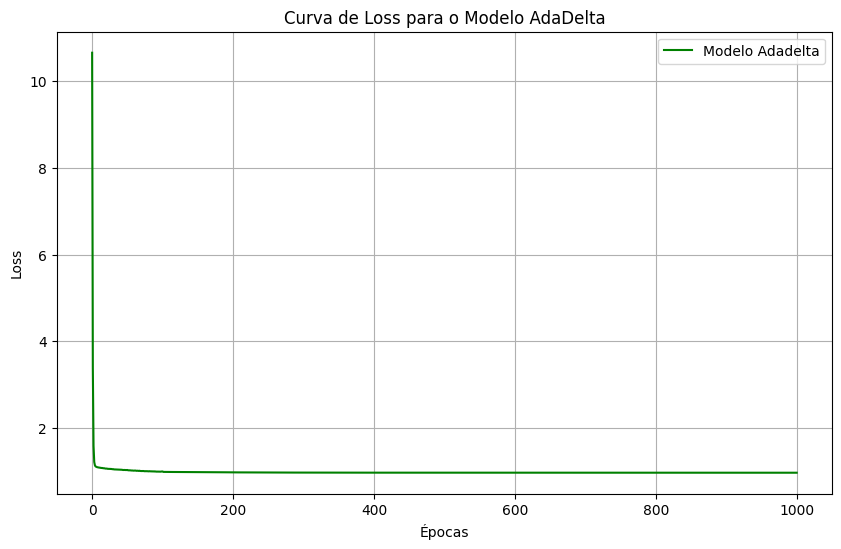

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history2.history['loss'], label='Modelo Adadelta', color='green')

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Loss para o Modelo AdaDelta')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
previsoesAdadelta = model2.predict(X_test)

115/115 [==============================] - 0s 3ms/step


In [ ]:
rótulos_previstosAda = np.argmax(previsoesAdadelta, axis=1)

In [ ]:
matriz_confusao = confusion_matrix(y_test, rótulos_previstosAda)

# Imprima a matriz de confusão
print("Matriz de Confusão AdaDelta:")
print(matriz_confusao)

Matriz de Confusão AdaDelta:
[[1472   26  138]
 [ 698   14  195]
 [ 532   17  572]]


In [ ]:
# Supondo que você já tenha treinado o modelo e feito previsões no conjunto de validação (X_val)
previsoes_val = model2.predict(X_val)
rotulos_previstos_val = np.argmax(previsoes_val, axis=1)

# Calcular a matriz de confusão para o conjunto de validação
matriz_confusao_val = confusion_matrix(y_val, rotulos_previstos_val)

# Imprimir a matriz de confusão para o conjunto de validação
print("Matriz de Confusão para Validação AdaDelta:")
print(matriz_confusao_val)


115/115 [==============================] - 0s 3ms/step
Matriz de Confusão para Validação AdaDelta:
[[1491   15  130]
 [ 677   14  215]
 [ 553   10  559]]


In [ ]:
print(classification_report(y_test, rótulos_previstosAda))

              precision    recall  f1-score   support

           0       0.54      0.90      0.68      1636
           1       0.25      0.02      0.03       907
           2       0.63      0.51      0.56      1121

    accuracy                           0.56      3664
   macro avg       0.47      0.48      0.42      3664
weighted avg       0.50      0.56      0.48      3664



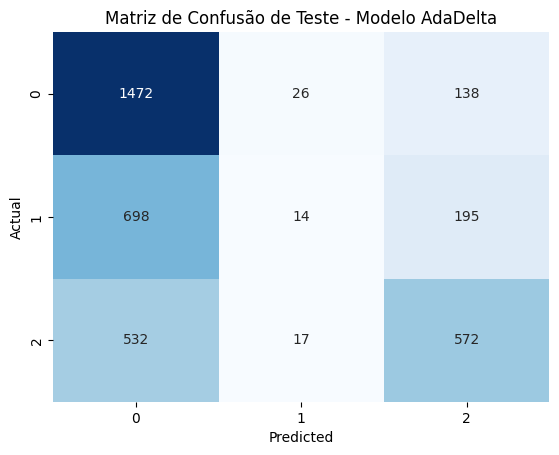

In [ ]:
# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test, rótulos_previstosAda)

# Criar um heatmap da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Definir rótulos dos eixos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão de Teste - Modelo AdaDelta')

# Exibir a matriz de confusão
plt.show()

# Modelo Random Forest

In [ ]:
modelo3 = RandomForestClassifier(random_state=2023)

In [ ]:
modelo3.fit(X_train, y_train)

RandomForestClassifier(random_state=2023)

In [ ]:
previsoes = modelo3.predict(X_test)

In [ ]:
precisao = accuracy_score(y_test, previsoes)
print(f"A precisão do modelo é: {precisao}")

A precisão do modelo é: 0.8392467248908297


In [ ]:
previsoes_rf = modelo3.predict(X_test)

In [ ]:
precisao_rf = accuracy_score(y_test, previsoes_rf)
matriz_confusao_rf = confusion_matrix(y_test, previsoes_rf)

print(f"A precisão do modelo Random Forest é: {precisao_rf}")
print("Matriz de Confusão:")
print(matriz_confusao_rf)

A precisão do modelo Random Forest é: 0.8392467248908297
Matriz de Confusão:
[[1513  103   20]
 [ 203  577  127]
 [  24  112  985]]


In [ ]:
previsoes_rf_val = modelo3.predict(X_val)

# Calcular a matriz de confusão para o conjunto de validação
matriz_confusao_val = confusion_matrix(y_val, previsoes_rf_val)

# Imprimir a matriz de confusão para o conjunto de validação
print("Matriz de Confusão para Validação Random Forest:")
print(matriz_confusao_val)

Matriz de Confusão para Validação Random Forest:
[[1495  110   31]
 [ 220  542  144]
 [  26  103  993]]


In [ ]:
print(classification_report(y_test, previsoes_rf))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1636
           1       0.73      0.64      0.68       907
           2       0.87      0.88      0.87      1121

    accuracy                           0.84      3664
   macro avg       0.82      0.81      0.82      3664
weighted avg       0.83      0.84      0.84      3664



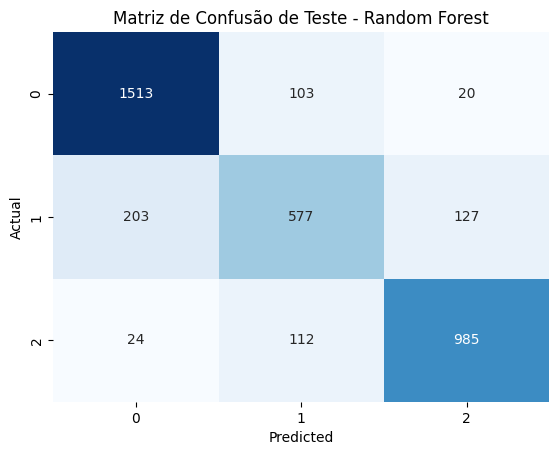

In [ ]:
# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test, previsoes)

# Criar um heatmap da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Definir rótulos dos eixos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão de Teste - Random Forest')

# Exibir a matriz de confusão
plt.show()

# Modelo RMSprop

In [ ]:
# Crie o modelo sequencial
model4 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model4.add(tf.keras.layers.Dense(3, activation='softmax')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model4.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])


history4 = model4.fit(X_train.values, y_train_one_hot, epochs=1000, batch_size=int(0.05*len(X_train)), verbose=1,
                       callbacks=[early_stopping_callback, lr_scheduler_callback],
                       validation_data=(X_val.values, y_val_one_hot))


Epoch 1/1000
21/21 [==============================] - 1s 31ms/step - loss: 29.5879 - accuracy: 0.3675 - val_loss: 1.1130 - val_accuracy: 0.3674 - lr: 0.0050
Epoch 2/1000
21/21 [==============================] - 1s 33ms/step - loss: 1.1090 - accuracy: 0.4255 - val_loss: 1.1529 - val_accuracy: 0.2800 - lr: 0.0050
Epoch 3/1000
21/21 [==============================] - 1s 34ms/step - loss: 1.2016 - accuracy: 0.3947 - val_loss: 1.0867 - val_accuracy: 0.4127 - lr: 0.0050
Epoch 4/1000
21/21 [==============================] - 1s 32ms/step - loss: 1.0806 - accuracy: 0.4353 - val_loss: 1.0894 - val_accuracy: 0.3665 - lr: 0.0050
Epoch 5/1000
21/21 [==============================] - 1s 33ms/step - loss: 1.7072 - accuracy: 0.3847 - val_loss: 1.0905 - val_accuracy: 0.4454 - lr: 0.0050
Epoch 6/1000
21/21 [==============================] - 1s 32ms/step - loss: 1.0737 - accuracy: 0.4436 - val_loss: 1.1089 - val_accuracy: 0.4465 - lr: 0.0050
Epoch 7/1000
21/21 [==============================] - 1s 34ms/s

In [ ]:
previsoesRMSP = model4.predict(X_test)
rótulos_previstosRMSP = np.argmax(previsoesRMSP, axis=1)

matriz_confusao = confusion_matrix(y_test, rótulos_previstosRMSP)

# Imprima a matriz de confusão
print("Matriz de Confusão RMSprop:")
print(matriz_confusao)

115/115 [==============================] - 0s 3ms/step
Matriz de Confusão RMSprop:
[[1462  153   21]
 [ 157  622  128]
 [  25  158  938]]


In [ ]:
previsoes_val = model4.predict(X_val)
rotulos_previstos_val = np.argmax(previsoes_val, axis=1)

# Calcular a matriz de confusão para o conjunto de validação
matriz_confusao_val = confusion_matrix(y_val, rotulos_previstos_val)

# Imprimir a matriz de confusão para o conjunto de validação
print("Matriz de Confusão para Validação RMSprop:")
print(matriz_confusao_val)

115/115 [==============================] - 0s 3ms/step
Matriz de Confusão para Validação RMSprop:
[[1465  153   18]
 [ 178  614  114]
 [  15  144  963]]


In [ ]:
print(classification_report(y_test, rótulos_previstosRMSP))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1636
           1       0.67      0.69      0.68       907
           2       0.86      0.84      0.85      1121

    accuracy                           0.82      3664
   macro avg       0.81      0.81      0.81      3664
weighted avg       0.83      0.82      0.83      3664



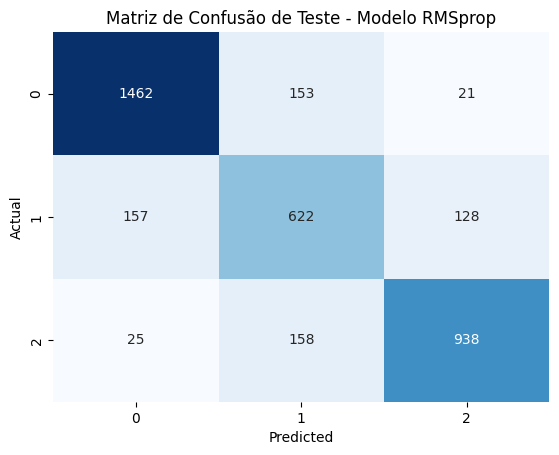

In [ ]:
# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test, rótulos_previstosRMSP)

# Criar um heatmap da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Definir rótulos dos eixos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão de Teste - Modelo RMSprop')

# Exibir a matriz de confusão
plt.show()

# Modelo NAdam

In [ ]:
# Crie o modelo sequencial
model5 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model5.add(tf.keras.layers.Dense(3, activation='softmax')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model5.compile(optimizer=tf.keras.optimizers.Nadam(), loss='categorical_crossentropy', metrics=['accuracy'])


history5 = model5.fit(X_train.values, y_train_one_hot, epochs=1000, batch_size=int(0.05*len(X_train)), verbose=1,
                       callbacks=[early_stopping_callback, lr_scheduler_callback],
                       validation_data=(X_val.values, y_val_one_hot))


Epoch 1/1000
21/21 [==============================] - 3s 31ms/step - loss: 9.2793 - accuracy: 0.3717 - val_loss: 1.1571 - val_accuracy: 0.4293 - lr: 0.0050
Epoch 2/1000
21/21 [==============================] - 0s 22ms/step - loss: 1.0838 - accuracy: 0.4280 - val_loss: 1.1173 - val_accuracy: 0.3518 - lr: 0.0050
Epoch 3/1000
21/21 [==============================] - 0s 22ms/step - loss: 1.0748 - accuracy: 0.4409 - val_loss: 1.0942 - val_accuracy: 0.3704 - lr: 0.0050
Epoch 4/1000
21/21 [==============================] - 0s 22ms/step - loss: 1.0693 - accuracy: 0.4421 - val_loss: 1.0850 - val_accuracy: 0.4465 - lr: 0.0050
Epoch 5/1000
21/21 [==============================] - 0s 20ms/step - loss: 1.0599 - accuracy: 0.4523 - val_loss: 1.0577 - val_accuracy: 0.4547 - lr: 0.0050
Epoch 6/1000
21/21 [==============================] - 0s 20ms/step - loss: 1.0365 - accuracy: 0.4770 - val_loss: 1.2035 - val_accuracy: 0.4522 - lr: 0.0050
Epoch 7/1000
21/21 [==============================] - 0s 21ms/st

In [ ]:
previsoesNadam = model5.predict(X_test)
rótulos_previstosNadam = np.argmax(previsoesNadam, axis=1)

matriz_confusao = confusion_matrix(y_test, rótulos_previstosNadam)

# Imprima a matriz de confusão
print("Matriz de Confusão Nadam:")
print(matriz_confusao)

115/115 [==============================] - 0s 2ms/step
Matriz de Confusão Nadam:
[[1502  123   11]
 [  79  745   83]
 [   7  107 1007]]


In [ ]:
previsoes_val = model5.predict(X_val)
rotulos_previstos_val = np.argmax(previsoes_val, axis=1)

# Calcular a matriz de confusão para o conjunto de validação
matriz_confusao_val = confusion_matrix(y_val, rotulos_previstos_val)

# Imprimir a matriz de confusão para o conjunto de validação
print("Matriz de Confusão para Validação Nadam:")
print(matriz_confusao_val)

115/115 [==============================] - 0s 2ms/step
Matriz de Confusão para Validação Nadam:
[[1506  120   10]
 [  99  716   91]
 [   5  111 1006]]


In [ ]:
print(classification_report(y_test, rótulos_previstosNadam))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1636
           1       0.76      0.82      0.79       907
           2       0.91      0.90      0.91      1121

    accuracy                           0.89      3664
   macro avg       0.87      0.88      0.88      3664
weighted avg       0.89      0.89      0.89      3664



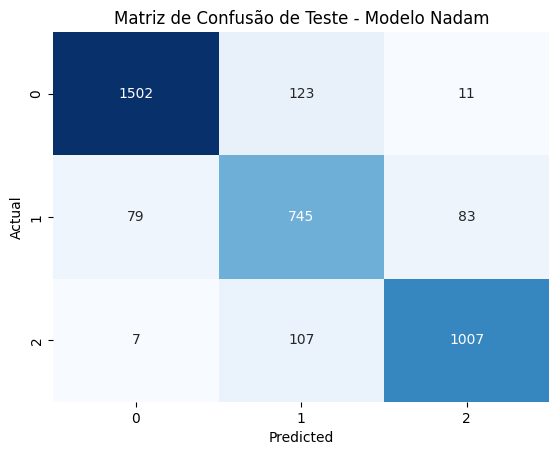

In [ ]:
# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test, rótulos_previstosNadam)

# Criar um heatmap da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Definir rótulos dos eixos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão de Teste - Modelo Nadam')

# Exibir a matriz de confusão
plt.show()

# Modelo Adagrad

In [ ]:
# Crie o modelo sequencial
model6 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(3, activation='softmax')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model6.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='categorical_crossentropy', metrics=['accuracy'])


history6 = model6.fit(X_train.values, y_train_one_hot, epochs=1000, batch_size=int(0.05*len(X_train)), verbose=1,
                       callbacks=[early_stopping_callback, lr_scheduler_callback],
                       validation_data=(X_val.values, y_val_one_hot))


Epoch 1/1000
21/21 [==============================] - 1s 28ms/step - loss: 7.3475 - accuracy: 0.3607 - val_loss: 1.2970 - val_accuracy: 0.4078 - lr: 0.0050
Epoch 2/1000
21/21 [==============================] - 0s 21ms/step - loss: 1.1046 - accuracy: 0.4216 - val_loss: 1.5741 - val_accuracy: 0.3996 - lr: 0.0050
Epoch 3/1000
21/21 [==============================] - 0s 19ms/step - loss: 1.1059 - accuracy: 0.4254 - val_loss: 1.1632 - val_accuracy: 0.3622 - lr: 0.0050
Epoch 4/1000
21/21 [==============================] - 0s 21ms/step - loss: 1.0998 - accuracy: 0.4141 - val_loss: 1.6973 - val_accuracy: 0.3084 - lr: 0.0050
Epoch 5/1000
21/21 [==============================] - 0s 19ms/step - loss: 1.1136 - accuracy: 0.4306 - val_loss: 1.2369 - val_accuracy: 0.3133 - lr: 0.0050
Epoch 6/1000
21/21 [==============================] - 0s 19ms/step - loss: 1.0800 - accuracy: 0.4348 - val_loss: 1.0936 - val_accuracy: 0.3916 - lr: 0.0050
Epoch 7/1000
21/21 [==============================] - 1s 26ms/st

In [ ]:
previsoesAdagrad = model6.predict(X_test)
rótulos_previstosAdagrad = np.argmax(previsoesAdagrad, axis=1)

matriz_confusao = confusion_matrix(y_test, rótulos_previstosAdagrad)

# Imprima a matriz de confusão
print("Matriz de Confusão Adagrad:")
print(matriz_confusao)

115/115 [==============================] - 0s 2ms/step
Matriz de Confusão Adagrad:
[[1494   10  132]
 [ 546   25  336]
 [ 227   21  873]]


In [ ]:
# Supondo que você já tenha treinado o modelo e feito previsões no conjunto de validação (X_val)
previsoes_val = model6.predict(X_val)
rotulos_previstos_val = np.argmax(previsoes_val, axis=1)

# Calcular a matriz de confusão para o conjunto de validação
matriz_confusao_val = confusion_matrix(y_val, rotulos_previstos_val)

# Imprimir a matriz de confusão para o conjunto de validação
print("Matriz de Confusão para Validação Adagrad:")
print(matriz_confusao_val)

115/115 [==============================] - 0s 2ms/step
Matriz de Confusão para Validação Adagrad:
[[1494   10  132]
 [ 561   21  324]
 [ 210   20  892]]


In [ ]:
print(classification_report(y_test, rótulos_previstosAdagrad))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77      1636
           1       0.45      0.03      0.05       907
           2       0.65      0.78      0.71      1121

    accuracy                           0.65      3664
   macro avg       0.59      0.57      0.51      3664
weighted avg       0.60      0.65      0.57      3664



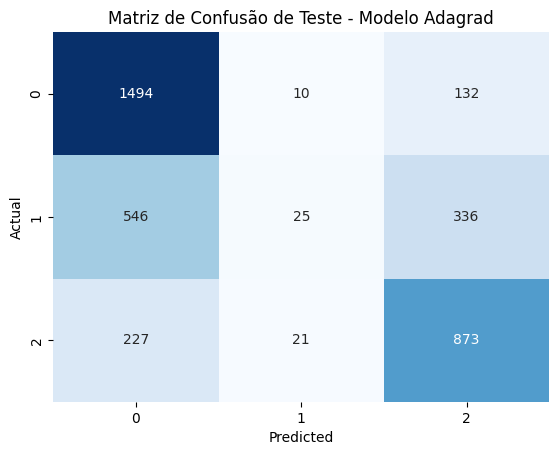

In [ ]:
# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test, rótulos_previstosAdagrad)

# Criar um heatmap da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Definir rótulos dos eixos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão de Teste - Modelo Adagrad')

# Exibir a matriz de confusão
plt.show()

In [ ]:
# Crie o modelo sequencial
model7 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model7.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model7.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model7.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model7.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model7.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model7.add(tf.keras.layers.Dense(3, activation='softmax')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model7.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])


history7 = model7.fit(X_train.values, y_train_one_hot, epochs=1000, batch_size=int(0.05*len(X_train)), verbose=1,
                       callbacks=[early_stopping_callback, lr_scheduler_callback],
                       validation_data=(X_val.values, y_val_one_hot))

Epoch 1/1000
21/21 [==============================] - 2s 46ms/step - loss: 7.8997 - accuracy: 0.3982 - val_loss: 1.1467 - val_accuracy: 0.3619 - lr: 0.0050
Epoch 2/1000
21/21 [==============================] - 1s 32ms/step - loss: 1.0783 - accuracy: 0.4393 - val_loss: 1.3628 - val_accuracy: 0.2718 - lr: 0.0050
Epoch 3/1000
21/21 [==============================] - 1s 32ms/step - loss: 1.0835 - accuracy: 0.4357 - val_loss: 1.2011 - val_accuracy: 0.4129 - lr: 0.0050
Epoch 4/1000
21/21 [==============================] - 1s 32ms/step - loss: 1.0736 - accuracy: 0.4472 - val_loss: 1.2310 - val_accuracy: 0.4323 - lr: 0.0050
Epoch 5/1000
21/21 [==============================] - 1s 33ms/step - loss: 1.0730 - accuracy: 0.4483 - val_loss: 1.0908 - val_accuracy: 0.4337 - lr: 0.0050
Epoch 6/1000
21/21 [==============================] - 1s 32ms/step - loss: 1.0662 - accuracy: 0.4539 - val_loss: 1.0929 - val_accuracy: 0.4162 - lr: 0.0050
Epoch 7/1000
21/21 [==============================] - 1s 31ms/st

# Modelo SGD

In [ ]:
previsoesSGD = model7.predict(X_test)
rótulos_previstosSGD = np.argmax(previsoesSGD, axis=1)

matriz_confusao = confusion_matrix(y_test, rótulos_previstosSGD)

# Imprima a matriz de confusão
print("Matriz de Confusão SGD:")
print(matriz_confusao)

115/115 [==============================] - 0s 2ms/step
Matriz de Confusão SGD:
[[1436    5  195]
 [ 557   10  340]
 [ 278   16  827]]


In [ ]:
previsoes_val = model7.predict(X_val)
rotulos_previstos_val = np.argmax(previsoes_val, axis=1)

# Calcular a matriz de confusão para o conjunto de validação
matriz_confusao_val = confusion_matrix(y_val, rotulos_previstos_val)

# Imprimir a matriz de confusão para o conjunto de validação
print("Matriz de Confusão para Validação SGD:")
print(matriz_confusao_val)

115/115 [==============================] - 0s 2ms/step
Matriz de Confusão para Validação SGD:
[[1422    2  212]
 [ 572   13  321]
 [ 277   13  832]]


In [ ]:
print(classification_report(y_test, rótulos_previstosSGD))

              precision    recall  f1-score   support

           0       0.63      0.88      0.74      1636
           1       0.32      0.01      0.02       907
           2       0.61      0.74      0.67      1121

    accuracy                           0.62      3664
   macro avg       0.52      0.54      0.47      3664
weighted avg       0.55      0.62      0.54      3664



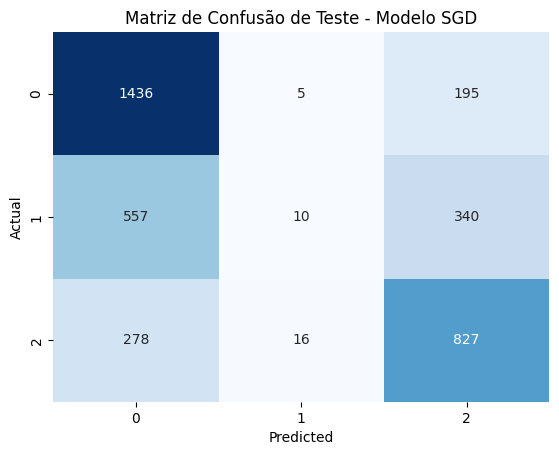

In [ ]:
# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test, rótulos_previstosSGD)

# Criar um heatmap da matriz de confusão
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Definir rótulos dos eixos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão de Teste - Modelo SGD')

# Exibir a matriz de confusão
plt.show()

# Comparações Finais

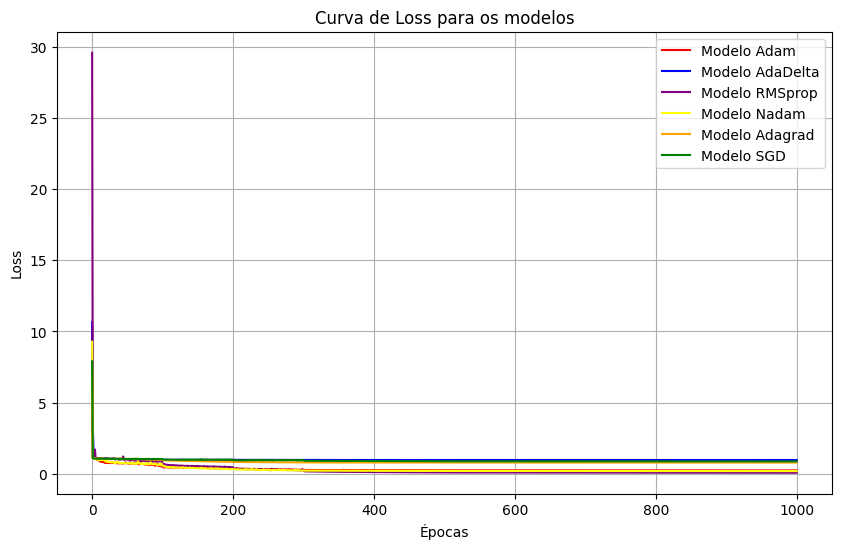

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label='Modelo Adam', color='red')
plt.plot(history2.history['loss'], label='Modelo AdaDelta', color='blue')
plt.plot(history4.history['loss'], label='Modelo RMSprop', color='purple')
plt.plot(history5.history['loss'], label='Modelo Nadam', color='yellow')
plt.plot(history6.history['loss'], label='Modelo Adagrad', color='orange')
plt.plot(history7.history['loss'], label='Modelo SGD', color='green')


plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Loss para os modelos')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('-------------- Métricas Random Forest --------------')
print('')
print(classification_report(y_test, previsoes_rf))
print('')

print('--------------- Métricas Modelo Adam ---------------')
print('')
print(classification_report(y_test, rótulos_previstosAdam))
print('')


print('------------- Métricas Modelo AdaDelta -------------')
print('')
print(classification_report(y_test, rótulos_previstosAda))
print('')

print('------------- Métricas Modelo RMSprop -------------')
print('')
print(classification_report(y_test, rótulos_previstosRMSP))
print('')

print('------------- Métricas Modelo Nadam -------------')
print('')
print(classification_report(y_test, rótulos_previstosNadam))
print('')

print('------------- Métricas Modelo Adagrad -------------')
print('')
print(classification_report(y_test, rótulos_previstosAdagrad))
print('')

print('------------- Métricas Modelo SGD -------------')
print('')
print(classification_report(y_test, rótulos_previstosSGD))
print('')



-------------- Métricas Random Forest --------------

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1636
           1       0.73      0.64      0.68       907
           2       0.87      0.88      0.87      1121

    accuracy                           0.84      3664
   macro avg       0.82      0.81      0.82      3664
weighted avg       0.83      0.84      0.84      3664


--------------- Métricas Modelo Adam ---------------

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1636
           1       0.78      0.83      0.80       907
           2       0.92      0.90      0.91      1121

    accuracy                           0.89      3664
   macro avg       0.88      0.89      0.88      3664
weighted avg       0.90      0.89      0.90      3664


------------- Métricas Modelo AdaDelta -------------

              precision    recall  f1-score   support

           0       